In [113]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
dat = pd.read_csv("diabetes.csv")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [115]:
import numpy as np
dat["Outcome"] = np.where(dat["Outcome"]==1,"Diabetic","Non-Diabetic")
dat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


In [130]:
import seaborn as sb
sb.pairplot(dat,hue = "Outcome")

In [117]:
from sklearn.model_selection import train_test_split
import numpy as np
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X = np.array(X)
y = np.array(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [118]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [119]:
# import numpy as np
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
print(X_train)

tensor([[7.0000e+00, 1.5000e+02, 7.8000e+01,  ..., 3.5200e+01, 6.9200e-01,
         5.4000e+01],
        [4.0000e+00, 9.7000e+01, 6.0000e+01,  ..., 2.8200e+01, 4.4300e-01,
         2.2000e+01],
        [0.0000e+00, 1.6500e+02, 9.0000e+01,  ..., 5.2300e+01, 4.2700e-01,
         2.3000e+01],
        ...,
        [4.0000e+00, 9.4000e+01, 6.5000e+01,  ..., 2.4700e+01, 1.4800e-01,
         2.1000e+01],
        [1.1000e+01, 8.5000e+01, 7.4000e+01,  ..., 3.0100e+01, 3.0000e-01,
         3.5000e+01],
        [5.0000e+00, 1.3600e+02, 8.2000e+01,  ..., 0.0000e+00, 6.4000e-01,
         6.9000e+01]])


In [120]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,output_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,output_features)
    def forward(self,x):
        x = F.sigmoid(self.f_connected1(x))
        x = F.sigmoid(self.f_connected2(x))
        x = self.out(x)
        return x

In [121]:
torch.manual_seed(20)
model = ANN_Model()

In [122]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [123]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [124]:
iter = 500
final_losses = []
for it in range(iter):
    it = it + 1
    y_train_pred = model.forward(X_train)
    loss = loss_function(y_train_pred,y_train)
    final_losses.append(loss.item())
    if(it%10==1):
        print(f"Epoch: {it} loss: {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1 loss: 0.685165286064148
Epoch: 11 loss: 0.642486572265625
Epoch: 21 loss: 0.6185362935066223
Epoch: 31 loss: 0.5835117697715759
Epoch: 41 loss: 0.5573999881744385
Epoch: 51 loss: 0.5340840816497803
Epoch: 61 loss: 0.5145928859710693
Epoch: 71 loss: 0.49774816632270813
Epoch: 81 loss: 0.4813336730003357
Epoch: 91 loss: 0.4703226387500763
Epoch: 101 loss: 0.4598097801208496
Epoch: 111 loss: 0.4520743787288666
Epoch: 121 loss: 0.4451400935649872
Epoch: 131 loss: 0.43871936202049255
Epoch: 141 loss: 0.43188154697418213
Epoch: 151 loss: 0.4260617792606354
Epoch: 161 loss: 0.4281354248523712
Epoch: 171 loss: 0.41495710611343384
Epoch: 181 loss: 0.4059871733188629
Epoch: 191 loss: 0.39728525280952454
Epoch: 201 loss: 0.3987046778202057
Epoch: 211 loss: 0.3898565173149109
Epoch: 221 loss: 0.3850440979003906
Epoch: 231 loss: 0.37954363226890564
Epoch: 241 loss: 0.37388864159584045
Epoch: 251 loss: 0.3664432466030121
Epoch: 261 loss: 0.3622059226036072
Epoch: 271 loss: 0.369859218597412

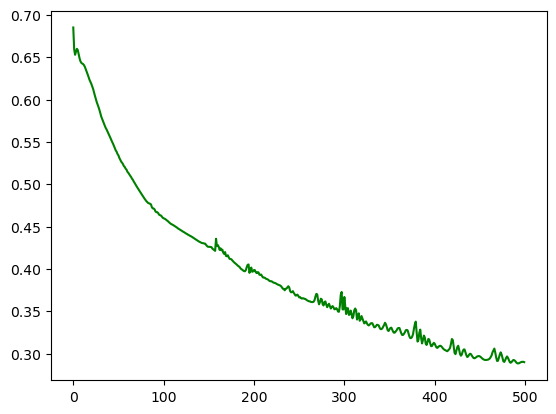

In [129]:
import matplotlib.pyplot as plt
import  numpy
plt.plot(np.array(range(iter)),final_losses,color = "green")
plt.show()

In [131]:
y_test_pred = []
with torch.no_grad():
    for data in X_test:
        y_test_pred.append(model(data).argmax().item())
print(y_test_pred)

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [132]:
y_test_act = []
for i in y_test:
    y_test_act.append(i.item())
print(y_test_act)

[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]


In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_act,y_test_pred)
cm

array([[83, 24],
       [14, 33]], dtype=int64)